<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Sklear_Polynomial_Regression_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [23]:
df = pd.read_csv('housing.data',delim_whitespace=True,header=None)
df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [24]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


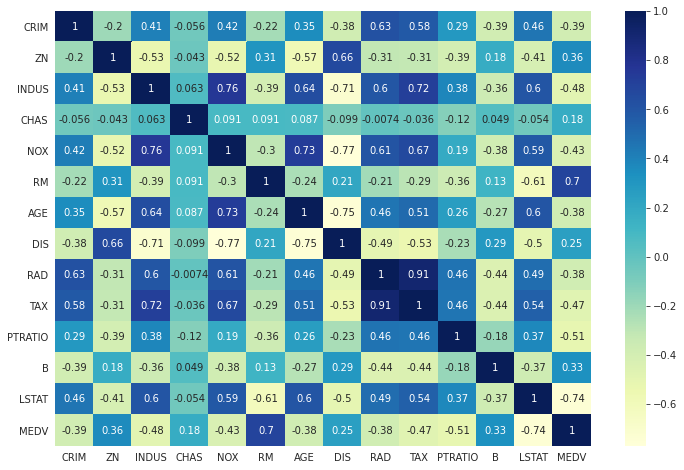

In [25]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

Since DIS and NOX is highly correlated we can predict using one to another with regression

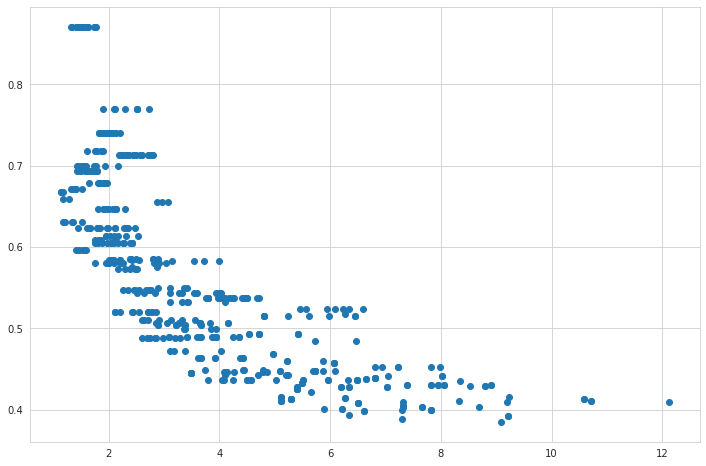

In [26]:
X_boston = df['DIS'].values
y_boston = df['NOX'].values
plt.figure(figsize=(12,8))
plt.scatter(X_boston,y_boston)

## Linear Regression

R^2 score = 0.59


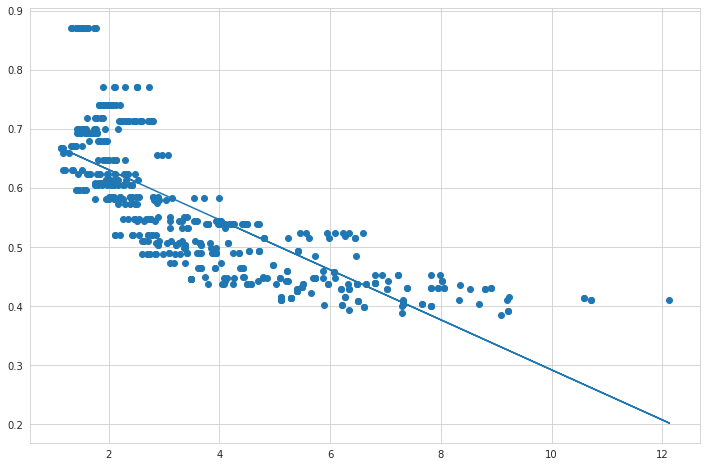

In [27]:
model = LinearRegression()
model.fit(X_boston.reshape(-1, 1), y_boston)
model_pred = model.predict(X_boston.reshape(-1,1))

plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);
plt.plot(X_boston, model_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, model_pred)))

## Polynomial Second Degree

In [40]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
model_2 = LinearRegression()

In [42]:
model_2.fit(X_poly_b, y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)

In [44]:
X_fit.reshape(-1,1)

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

In [45]:
y_pred = model_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.70


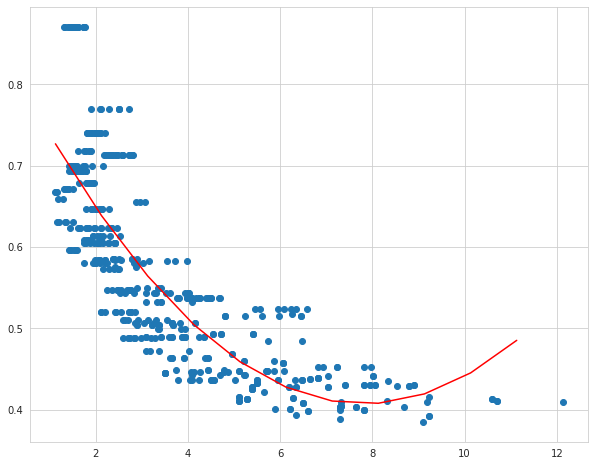

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(X_boston,y_boston)
plt.plot(X_fit.reshape(-1,1),y_pred,c='r')
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          model_2.predict(X_poly_b))))

## Polynomial Third Degree

In [34]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
model_3 = LinearRegression()

In [35]:
model_3.fit(X_poly_b, y_boston)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)

In [37]:
y_pred = model_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.71


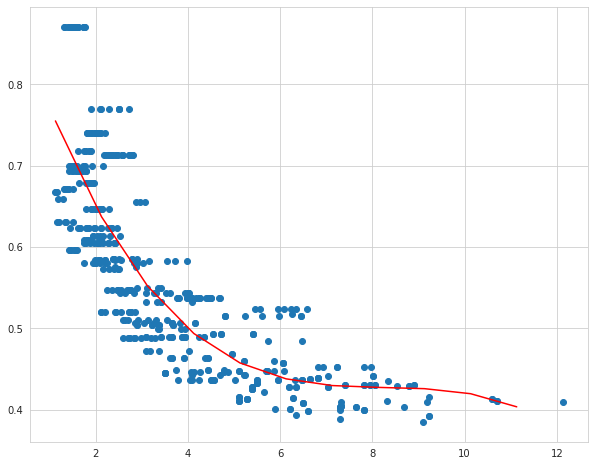

In [39]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred,c='r');
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          model_3.predict(X_poly_b))))